In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
 
import os
import random
import numpy as np
import matplotlib.pyplot as plt
 
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'
 
%matplotlib inline

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


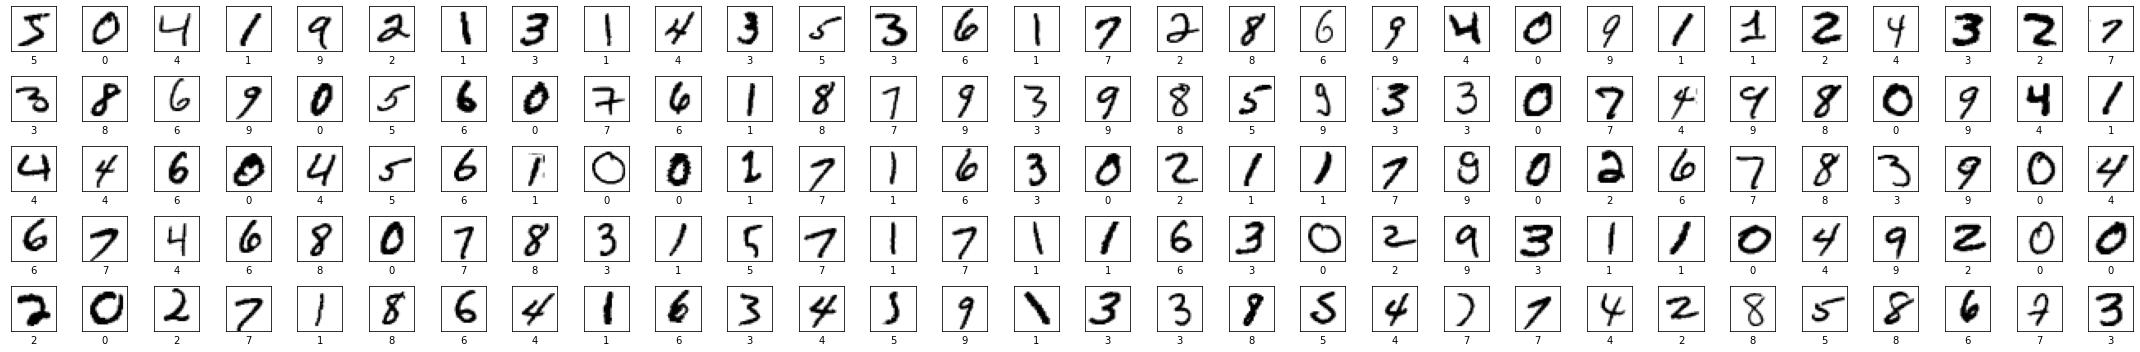

In [5]:
ROWS = 5
COLS = 30
i = 0

plt.figure(figsize=(30,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [7]:
# Data Normalization

X_train, X_test = X_train.reshape(-1, 28,28,1).astype("float32") / 255.0, X_test.reshape(-1, 28,28,1).astype("float32")  / 255.0

In [8]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [9]:
# Using 'Adam'

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
h = model.fit(x=X_train, y=Y_train, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 44s 36ms/step - loss: 0.2407 - accuracy: 0.9237 - val_loss: 0.1071 - val_accuracy: 0.9668
Epoch 2/5
1200/1200 [==============================] - 44s 36ms/step - loss: 0.0729 - accuracy: 0.9771 - val_loss: 0.0634 - val_accuracy: 0.9808
Epoch 3/5
1200/1200 [==============================] - 43s 36ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0488 - val_accuracy: 0.9867
Epoch 4/5
1200/1200 [==============================] - 43s 36ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0476 - val_accuracy: 0.9873
Epoch 5/5
1200/1200 [==============================] - 44s 36ms/step - loss: 0.0334 - accuracy: 0.9900 - val_loss: 0.0406 - val_accuracy: 0.9890


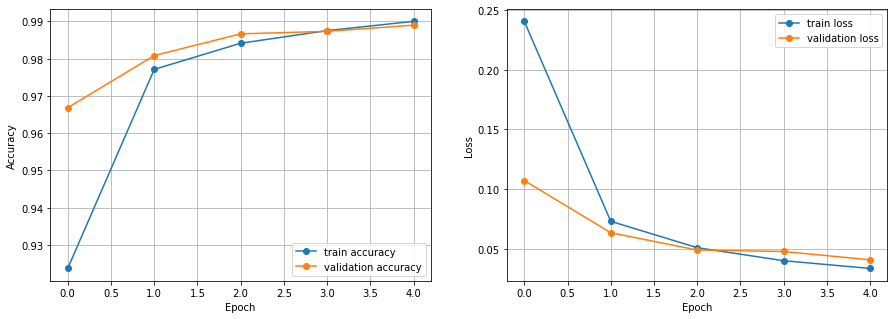

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 9ms/step - loss: 0.0352 - accuracy: 0.9898

Test Accuracy: 0.989799976348877

Test Loss: 0.03518929332494736


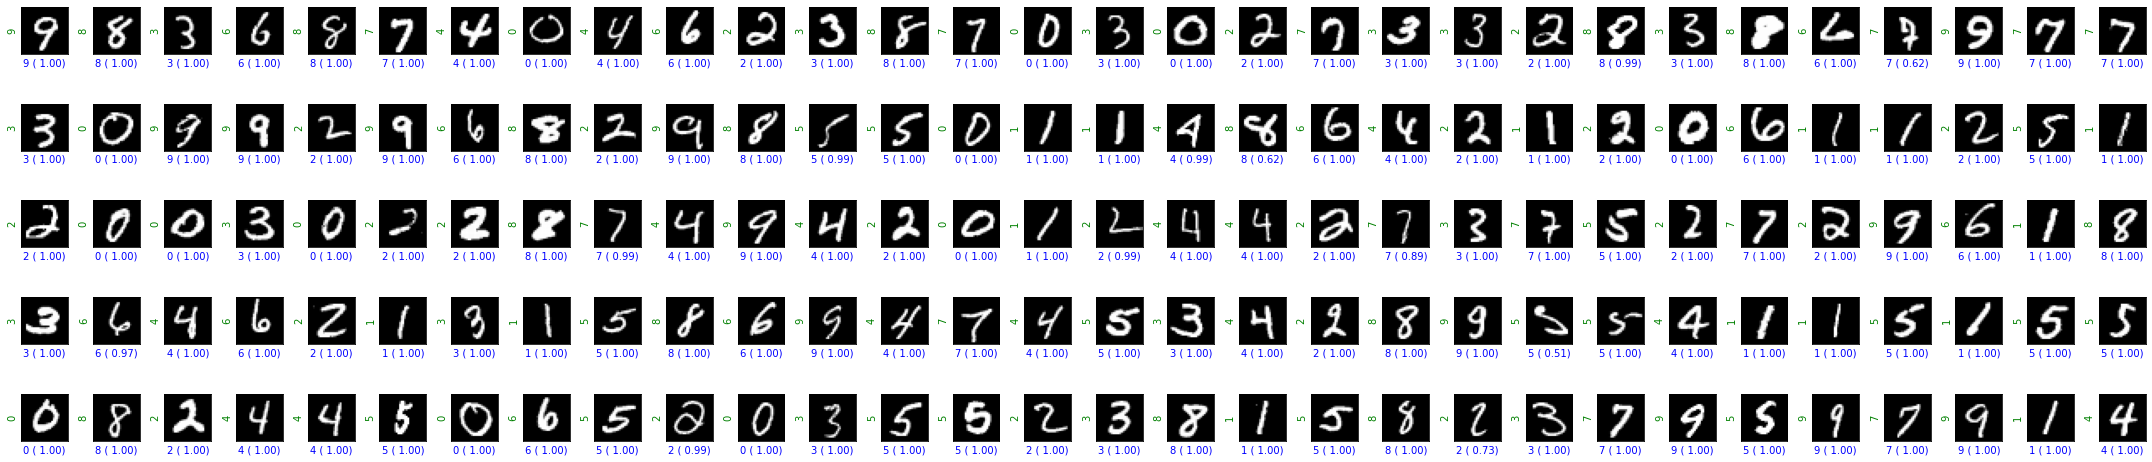

In [18]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [19]:
# Using 'SGD'

model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [21]:
h = model.fit(x=X_train, y=Y_train, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 46s 38ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.0364 - val_accuracy: 0.9911
Epoch 2/5
1200/1200 [==============================] - 45s 38ms/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.0368 - val_accuracy: 0.9909
Epoch 3/5
1200/1200 [==============================] - 46s 38ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.0365 - val_accuracy: 0.9914
Epoch 4/5
1200/1200 [==============================] - 46s 38ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0365 - val_accuracy: 0.9913
Epoch 5/5
1200/1200 [==============================] - 46s 38ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0383 - val_accuracy: 0.9911


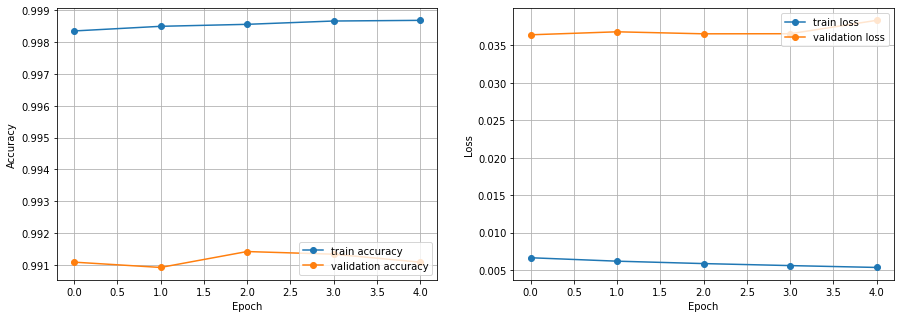

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [24]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 9ms/step - loss: 0.0337 - accuracy: 0.9905

Test Accuracy: 0.9904999732971191

Test Loss: 0.03372259810566902


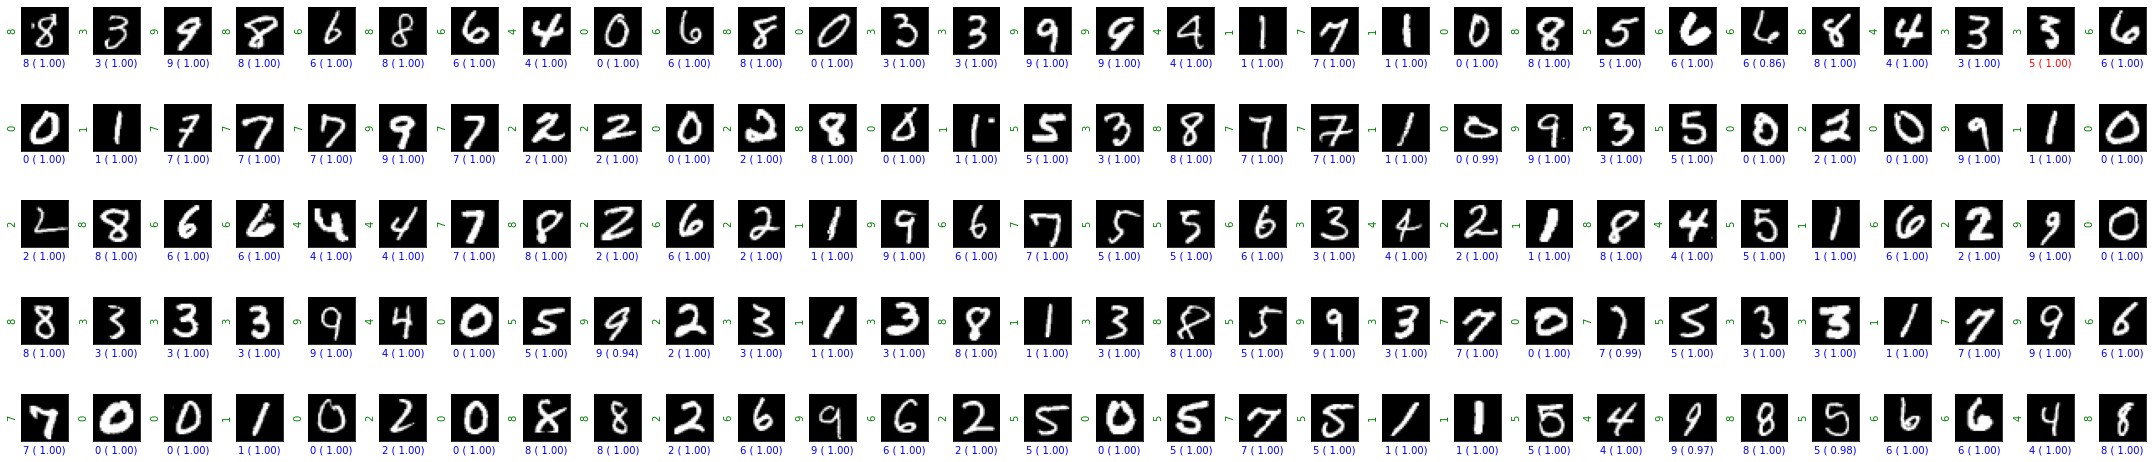

In [25]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [26]:
# Using 'RMSProp'

model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [27]:
h = model.fit(x=X_train, y=Y_train, epochs=5, batch_size=40, validation_split=0.2)

Epoch 1/5
1200/1200 [==============================] - 48s 39ms/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0591 - val_accuracy: 0.9861
Epoch 2/5
1200/1200 [==============================] - 46s 39ms/step - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0420 - val_accuracy: 0.9901
Epoch 3/5
1200/1200 [==============================] - 46s 38ms/step - loss: 0.0173 - accuracy: 0.9947 - val_loss: 0.0567 - val_accuracy: 0.9880
Epoch 4/5
1200/1200 [==============================] - 46s 38ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0621 - val_accuracy: 0.9861
Epoch 5/5
1200/1200 [==============================] - 46s 38ms/step - loss: 0.0139 - accuracy: 0.9959 - val_loss: 0.0564 - val_accuracy: 0.9882


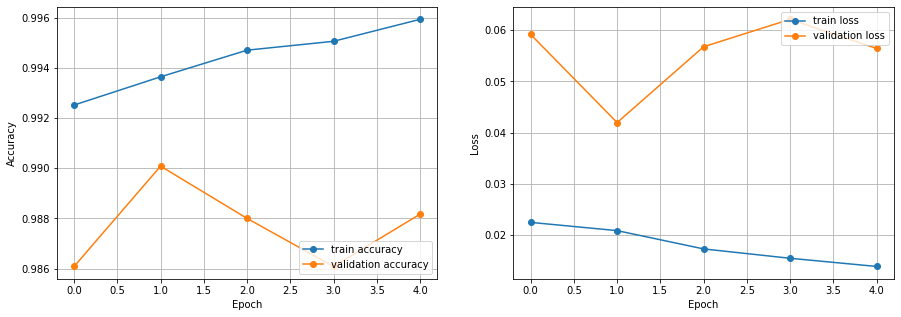

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [29]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 10ms/step - loss: 0.0499 - accuracy: 0.9890

Test Accuracy: 0.9890000224113464

Test Loss: 0.04990885779261589


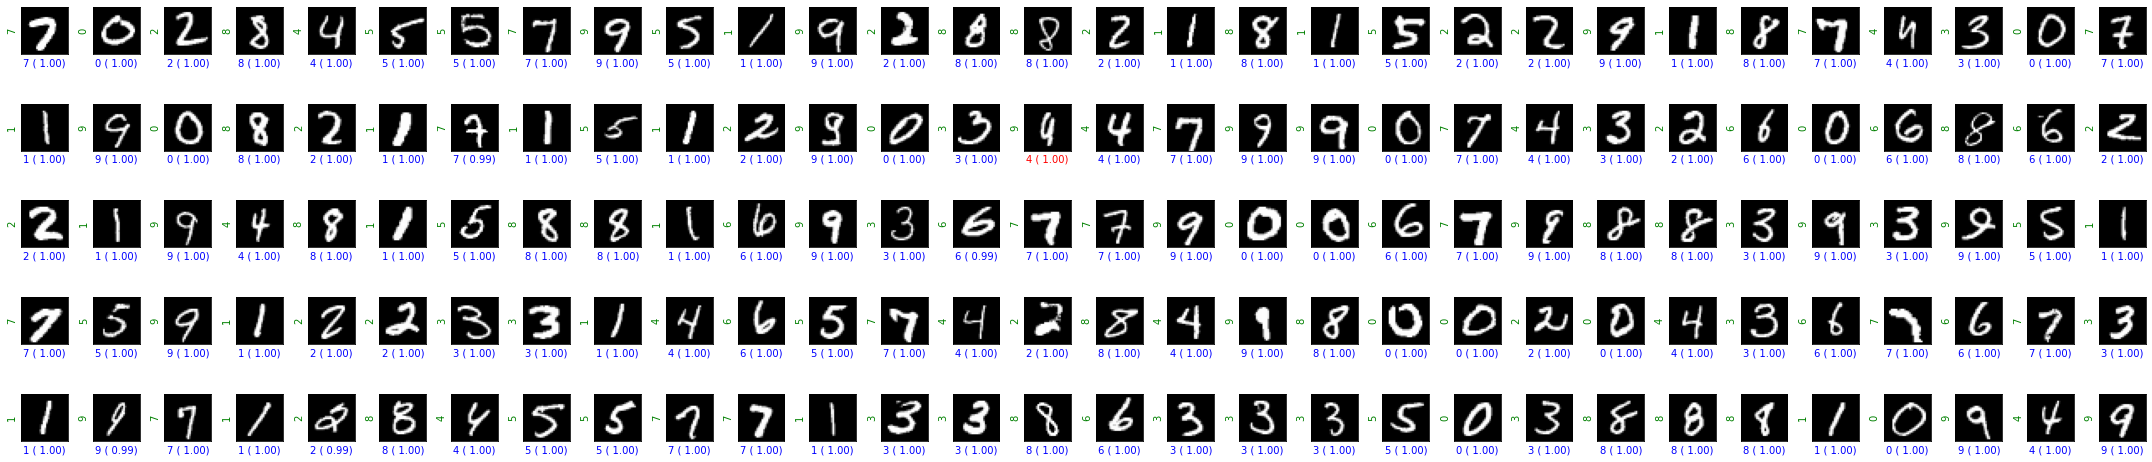

In [31]:
# Predicting Images

ROWS = 5
COLS = 30

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()